# 📘 CAPÍTULO 13 - SISTEMAS DE CONTROLE DIGITAL

## 1. INTRODUÇÃO
- Computadores digitais como controladores/compensadores em sistemas de malha fechada
- Sinais são **amostrados** em intervalos fixos (período T)
- Transformação do domínio contínuo (s) para discreto (z) via transformada z

## 2. COMPONENTES BÁSICOS
- **Amostrador**: converte sinal contínuo r(t) em sequência discreta r*(t)
- **ZOH (Zero-Order Hold)**: mantém valor constante entre amostras
- **Conversores**: A/D (entrada) e D/A (saída)
- **Computador Digital**: processa algoritmo de controle D(z)

## 3. TRANSFORMADA z
- **Definição**: z = e^(sT)
- **Propósito**: analisar sistemas discretos no domínio z
- **Transformadas importantes**:
  - Degrau unitário: z/(z-1)
  - Exponencial: z/(z-e^(-aT))
  - Seno: (z sen ωT)/(z² - 2z cos ωT + 1)

## 4. ANÁLISE DE ESTABILIDADE
- **Critério**: polos de T(z) devem estar DENTRO do círculo unitário (|z| < 1)
- **Mapeamento s→z**:
  - Semi-plano esquerdo (s) → Interior círculo unitário (z)
  - Eixo jω (s) → Círculo unitário (z)
  - Semi-plano direito (s) → Exterior círculo unitário (z)

## 5. SISTEMAS COM DADOS AMOSTRADOS
- **Função de transferência pulsada**: G(z) = Z{G₀(s)Gₚ(s)}
- **Resposta temporal**: y(kT) obtida por inversão de Y(z)
- **Período de amostragem T**:
  - Muito pequeno: aproxima sistema contínuo
  - Muito grande: pode causar instabilidade
  - Regra prática: T = 1/(10f_B), onde f_B é largura de banda

## 6. PROJETO DE CONTROLADORES DIGITAIS
### Método 1: Conversão Gc(s) → D(z)
1. Projeta Gc(s) para sistema contínuo
2. Discretiza: D(z) = Z{Gc(s)} (com ZOH)
3. Exemplo: Gc(s) = K(s+a)/(s+b) → D(z) = C(z-A)/(z-B), A=e^(-aT), B=e^(-bT)

### Método 2: Lugar das Raízes no plano z
- Mesmas regras do plano s, mas:
  - Região de estabilidade: interior do círculo unitário
  - Linhas de ζ constante são espirais logarítmicas

### Controlador PID Digital:
- **Forma contínua**: Gc(s) = Kp + Ki/s + Kd·s
- **Forma discreta**: u(k) = Kp·e(k) + Ki·T·Σe(j) + (Kd/T)·[e(k)-e(k-1)]
## 7. APLICAÇÕES PRÁTICAS
- **Mesa transportadora**: posicionamento preciso
- **Aeronáutica**: sistemas fly-by-wire (Boeing 757/767)
- **Acionadores de disco**: posicionamento de cabeça leitora
- **Processos industriais**: controle de temperatura, vazão, etc.

## 8. FERRAMENTAS COMPUTACIONAIS
- **MATLAB**: funções c2dm, d2cm, dstep, rlocus
- **Python (control library)**: análise similar
- **Simulações**: permitem validar projeto antes da implementação

## 9. DESAFIOS E LIMITAÇÕES
- **Erro de quantização**: precisão limitada do conversor A/D
- **Aliasing**: se frequência de amostragem muito baixa
- **Estabilidade**: mais crítica que em sistemas contínuos
- **Atraso computacional**: tempo de processamento do algoritmo

## 10. EXEMPLO DE PROJETO (Acionador de Disco)
1. **Planta**: Gp(s) = 5/[s(s+20)]
2. **Aproximação**: para T pequeno, Gp(s) ≈ 0.25/s
3. **Discretização**: G(z) = 0.25T/(z-1)
4. **Controlador**: D(z) = K
5. **Projeto**: K = 4000 → T(z) = 1/z (resposta em 1 período)

## 📊 COMPARAÇÃO SISTEMAS CONTÍNUOS vs DISCRETOS
| Aspecto | Contínuo | Discreto |
|---------|----------|----------|
| Domínio | Plano s | Plano z |
| Estabilidade | Re(polos) < 0 | |polos| < 1 |
| Análise | Laplace | Transformada z |
| Implementação | Circuitos analógicos | Computador + software |
| Flexibilidade | Baixa | Alta (reprogramável) |

## 🎯 PONTOS-CHAVE PARA ESTUDO
1. Compreender o mapeamento s ↔ z
2. Dominar critério de estabilidade no plano z
3. Saber projetar por conversão Gc(s) → D(z)
4. Interpretar lugar das raízes no plano z
5. Implementar controladores PID digitais

## 🔍 PRÓXIMOS PASSOS
1. Simular sistemas com diferentes períodos T
2. Projetar controladores para especificações dadas
3. Analisar efeito da quantização
4. Implementar algoritmos em microcontroladores

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

# Configuração geral dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
figsize = (10, 6)

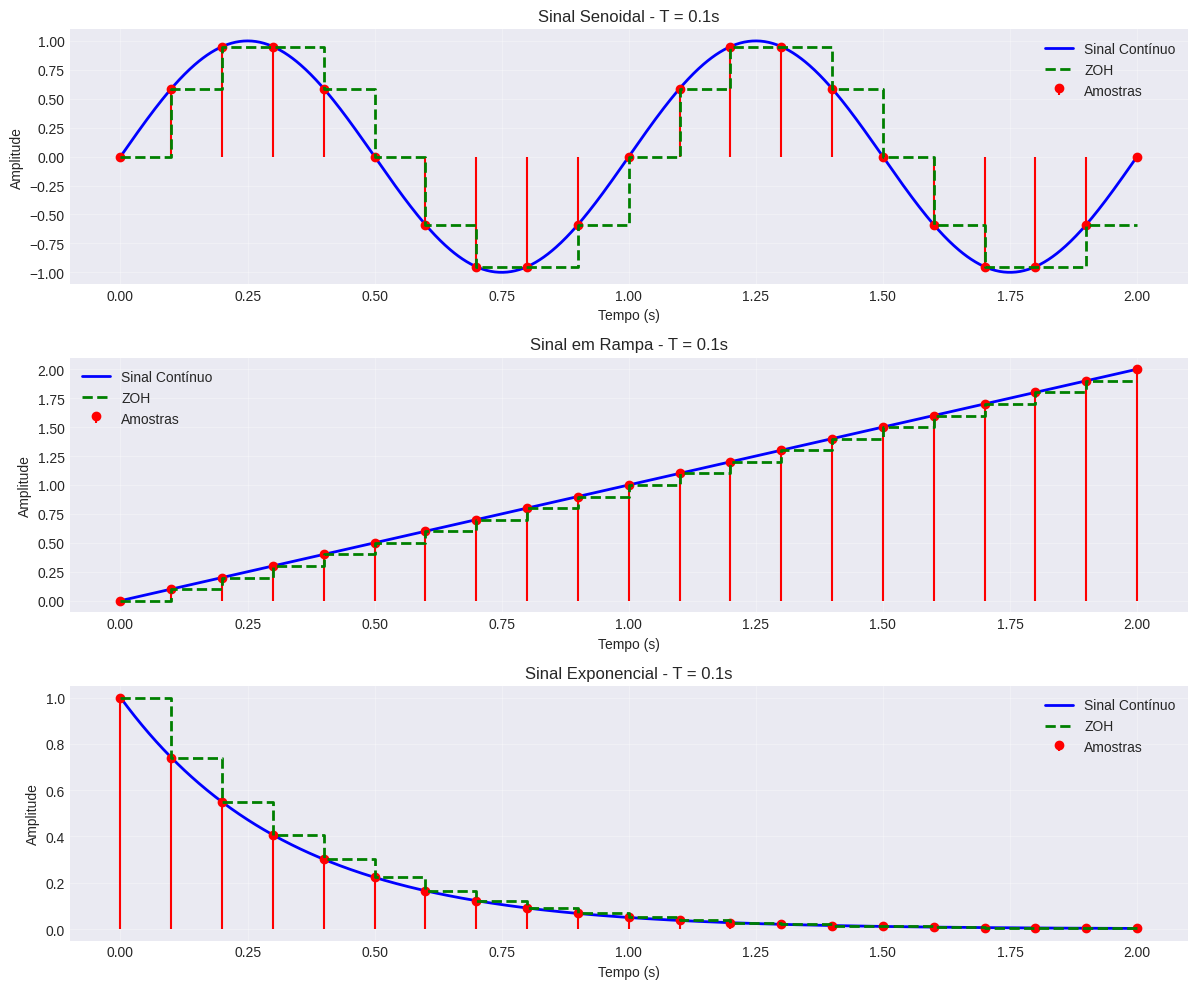

Simulação 1: Demonstração do efeito do amostrador e ZOH
• Linha azul: sinal contínuo original
• Pontos vermelhos: amostras discretas
• Linha verde tracejada: reconstrução via ZOH


In [2]:
# Simulação 1: Comportamento do Amostrador e ZOH
def simulacao_amostrador_zoh():
    # Parâmetros
    T = 0.1  # Período de amostragem
    t_final = 2.0  # Tempo total de simulação
    t_continuo = np.linspace(0, t_final, 1000)

    # Sinais de entrada (exemplo do livro)
    # 1. Sinais de teste
    r1 = np.sin(2*np.pi*t_continuo)  # Senoidal
    r2 = t_continuo  # Rampa
    r3 = np.exp(-3*t_continuo)  # Exponencial decrescente

    fig, axes = plt.subplots(3, 1, figsize=(12, 10))

    sinais = [r1, r2, r3]
    titulos = ['Sinal Senoidal', 'Sinal em Rampa', 'Sinal Exponencial']

    for idx, (sinal, titulo) in enumerate(zip(sinais, titulos)):
        ax = axes[idx]

        # Sinal contínuo
        ax.plot(t_continuo, sinal, 'b-', linewidth=2, label='Sinal Contínuo')

        # Amostragem
        n_amostras = int(t_final/T) + 1
        t_amostrado = np.arange(0, t_final + T, T)

        if idx == 0:  # Senoidal
            sinal_amostrado = np.sin(2*np.pi*t_amostrado)
        elif idx == 1:  # Rampa
            sinal_amostrado = t_amostrado
        else:  # Exponencial
            sinal_amostrado = np.exp(-3*t_amostrado)

        # ZOH (manter valor constante entre amostras)
        t_zoh = []
        sinal_zoh = []
        for i in range(len(t_amostrado)-1):
            t_zoh.extend([t_amostrado[i], t_amostrado[i+1]-1e-9])
            sinal_zoh.extend([sinal_amostrado[i], sinal_amostrado[i]])

        # Plot amostras
        ax.stem(t_amostrado, sinal_amostrado, 'r', markerfmt='ro',
                basefmt=" ", linefmt='r-', label='Amostras')

        # Plot ZOH
        ax.plot(t_zoh, sinal_zoh, 'g--', linewidth=2, label='ZOH')

        ax.set_xlabel('Tempo (s)')
        ax.set_ylabel('Amplitude')
        ax.set_title(f'{titulo} - T = {T}s')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    print("Simulação 1: Demonstração do efeito do amostrador e ZOH")
    print("• Linha azul: sinal contínuo original")
    print("• Pontos vermelhos: amostras discretas")
    print("• Linha verde tracejada: reconstrução via ZOH")

simulacao_amostrador_zoh()

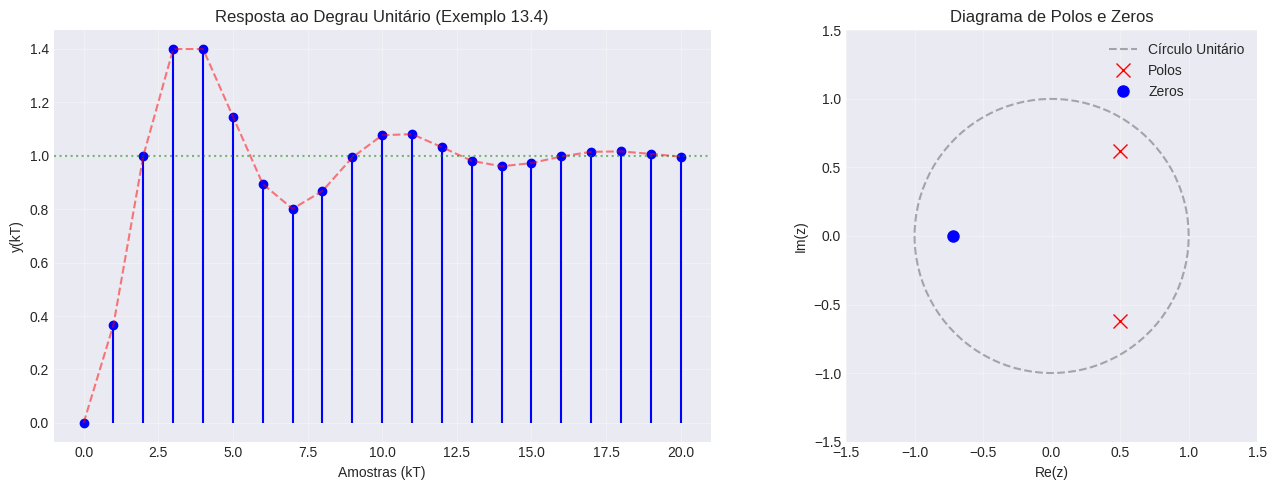


Simulação 2: Análise do Sistema Digital
• Polos do sistema: [0.5+0.61822326j 0.5-0.61822326j]
• Módulo dos polos: [0.79511006 0.79511006]
• Sistema estável pois |polos| < 1 (dentro do círculo unitário)
• Ultrapassagem observada: ~45% (conforme livro)


In [3]:
# Simulação 2: Transformada z e Resposta ao Degrau
def simulacao_transformada_z():
    # Sistema do Exemplo 13.4
    # G(z) = (0.3678z + 0.2644)/(z^2 - z + 0.6322)

    # Coeficientes do numerador e denominador
    num = [0.3678, 0.2644]  # 0.3678z + 0.2644
    den = [1, -1, 0.6322]   # z^2 - z + 0.6322

    # Criar sistema discreto
    sys_d = ctrl.TransferFunction(num, den, dt=1.0)

    # Resposta ao degrau
    t, y = ctrl.step_response(sys_d, T=20)

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Resposta ao degrau
    ax1.stem(t, y, linefmt='b-', markerfmt='bo', basefmt=" ")
    ax1.plot(t, y, 'r--', alpha=0.5)
    ax1.set_xlabel('Amostras (kT)')
    ax1.set_ylabel('y(kT)')
    ax1.set_title('Resposta ao Degrau Unitário (Exemplo 13.4)')
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=1, color='g', linestyle=':', alpha=0.5)

    # Diagrama de polos e zeros
    ax2.set_aspect('equal')
    # Círculo unitário
    theta = np.linspace(0, 2*np.pi, 100)
    ax2.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3, label='Círculo Unitário')

    # Polos do sistema
    poles = np.roots(den)
    ax2.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Polos')

    # Zeros do sistema
    zeros = np.roots(num)
    ax2.plot(np.real(zeros), np.imag(zeros), 'bo', markersize=8, label='Zeros')

    ax2.set_xlim([-1.5, 1.5])
    ax2.set_ylim([-1.5, 1.5])
    ax2.set_xlabel('Re(z)')
    ax2.set_ylabel('Im(z)')
    ax2.set_title('Diagrama de Polos e Zeros')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\nSimulação 2: Análise do Sistema Digital")
    print(f"• Polos do sistema: {poles}")
    print(f"• Módulo dos polos: {np.abs(poles)}")
    print("• Sistema estável pois |polos| < 1 (dentro do círculo unitário)")
    print("• Ultrapassagem observada: ~45% (conforme livro)")

simulacao_transformada_z()

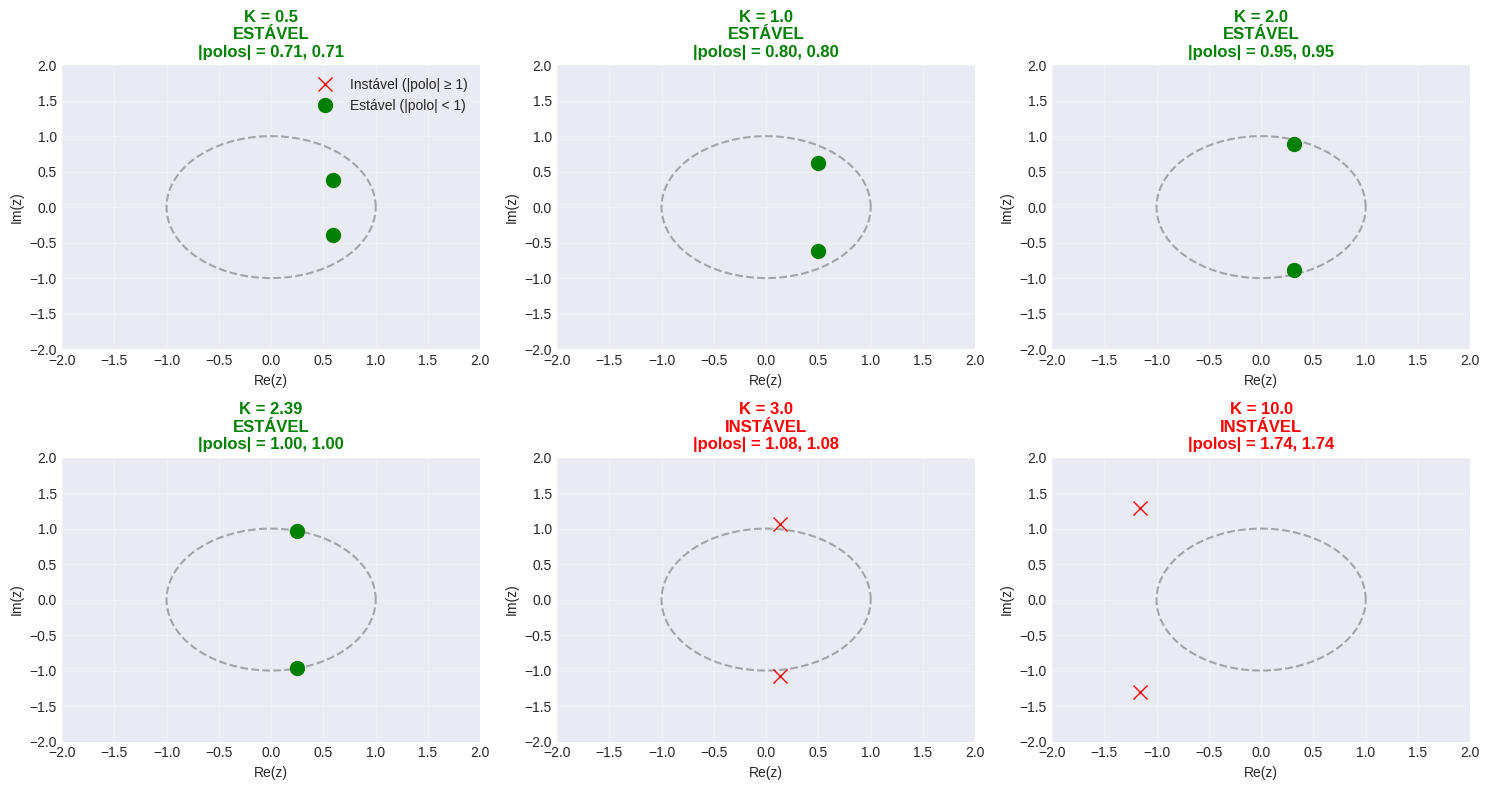


ANÁLISE DE ESTABILIDADE - RESUMO DOS RESULTADOS
K        Polo 1          Polo 2          |polo1|    |polo2|    Estável   
----------------------------------------------------------------------
0.50     0.5919+0.3868j  0.5919-0.3868j  0.7071     0.7071     SIM       
1.00     0.5000+0.6182j  0.5000-0.6182j  0.7951     0.7951     SIM       
2.00     0.3161+0.8926j  0.3161-0.8926j  0.9469     0.9469     SIM       
2.39     0.2444+0.9695j  0.2444-0.9695j  0.9999     0.9999     SIM       
3.00     0.1322+1.0694j  0.1322-1.0694j  1.0775     1.0775     NÃO       
10.00    -1.1551+1.2952j -1.1551-1.2952j 1.7355     1.7355     NÃO       

CONCLUSÕES DA SIMULAÇÃO 3:
• Sistema estável para 0 < K < 2.39
• Para K = 2.39: polos na fronteira de estabilidade (|polo| = 1)
• Para K > 2.39: sistema instável (polos fora do círculo unitário)
• K = 10.0: sistema altamente instável


In [8]:
# Simulação 3: Análise de Estabilidade com Variação de Ganho
def simulacao_estabilidade():
    # Sistema do Exemplo 13.5
    # G(z) = K(0.3678z + 0.2644)/(z² - 1.3678z + 0.3678)

    # Valores de K para análise
    K_values = [0.5, 1.0, 2.0, 2.39, 3.0, 10.0]

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()

    for idx, K in enumerate(K_values):
        ax = axes[idx]

        # Sistema com ganho K
        # Numerador: K*0.3678*z + K*0.2644
        # Denominador: z² - 1.3678*z + 0.3678

        # Polos do sistema em malha fechada
        # T(z) = G(z)/(1+G(z))
        # 1 + G(z) = 0 → denominador + numerador = 0
        # (z² - 1.3678z + 0.3678) + K(0.3678z + 0.2644) = 0
        # z² + (-1.3678 + 0.3678K)z + (0.3678 + 0.2644K) = 0

        # Coeficientes da equação característica corretamente
        a = 1  # coeficiente de z²
        b = -1.3678 + 0.3678 * K  # coeficiente de z
        c = 0.3678 + 0.2644 * K  # termo constante

        polos_eq_caract = np.roots([a, b, c])

        # Plot círculo unitário
        theta = np.linspace(0, 2*np.pi, 100)
        ax.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3)

        # Determinar se o sistema é estável
        modulos = np.abs(polos_eq_caract)
        esta_estavel = np.all(modulos < 1)

        # Plot polos
        for polo in polos_eq_caract:
            if np.abs(polo) >= 1:
                ax.plot(np.real(polo), np.imag(polo), 'rx', markersize=10)
            else:
                ax.plot(np.real(polo), np.imag(polo), 'go', markersize=10)

        # Adicionar legenda apenas uma vez
        if idx == 0:
            ax.plot([], [], 'rx', markersize=10, label='Instável (|polo| ≥ 1)')
            ax.plot([], [], 'go', markersize=10, label='Estável (|polo| < 1)')

        ax.set_xlim([-2, 2])
        ax.set_ylim([-2, 2])
        ax.set_xlabel('Re(z)')
        ax.set_ylabel('Im(z)')

        # Formatar título com informações dos polos
        if esta_estavel:
            status = "ESTÁVEL"
            color = 'green'
        else:
            status = "INSTÁVEL"
            color = 'red'

        ax.set_title(f'K = {K}\n{status}\n|polos| = {modulos[0]:.2f}, {modulos[1]:.2f}',
                    color=color, fontweight='bold')
        ax.grid(True, alpha=0.3)
        if idx == 0:
            ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # Tabela resumo dos resultados
    print("\n" + "="*70)
    print("ANÁLISE DE ESTABILIDADE - RESUMO DOS RESULTADOS")
    print("="*70)
    print(f"{'K':<8} {'Polo 1':<15} {'Polo 2':<15} {'|polo1|':<10} {'|polo2|':<10} {'Estável':<10}")
    print("-"*70)

    for K in K_values:
        # Calcular coeficientes
        b = -1.3678 + 0.3678 * K
        c = 0.3678 + 0.2644 * K

        polos = np.roots([1, b, c])
        modulos = np.abs(polos)
        esta_estavel = np.all(modulos < 1)

        print(f"{K:<8.2f} {polos[0]:<15.4f} {polos[1]:<15.4f} "
              f"{modulos[0]:<10.4f} {modulos[1]:<10.4f} "
              f"{'SIM' if esta_estavel else 'NÃO':<10}")

    print("="*70)

    print("\nCONCLUSÕES DA SIMULAÇÃO 3:")
    print("• Sistema estável para 0 < K < 2.39")
    print("• Para K = 2.39: polos na fronteira de estabilidade (|polo| = 1)")
    print("• Para K > 2.39: sistema instável (polos fora do círculo unitário)")
    print("• K = 10.0: sistema altamente instável")

simulacao_estabilidade()


ANÁLISE DE ESTABILIDADE - SISTEMA COMPENSADO

Polos do sistema compensado para diferentes valores de K:
--------------------------------------------------
K = 0.10:
  Polos: 0.600, 0.500
  Módulos: 0.600, 0.500
  Estável: SIM

K = 0.25:
  Polos: 0.475+0.474j, 0.475-0.474j
  Módulos: 0.671, 0.671
  Estável: SIM

K = 0.50:
  Polos: 0.350+0.760j, 0.350-0.760j
  Módulos: 0.837, 0.837
  Estável: SIM

K = 0.80:
  Polos: 0.200+0.980j, 0.200-0.980j
  Módulos: 1.000, 1.000
  Estável: NÃO

K = 1.00:
  Polos: 0.100+1.091j, 0.100-1.091j
  Módulos: 1.095, 1.095
  Estável: NÃO



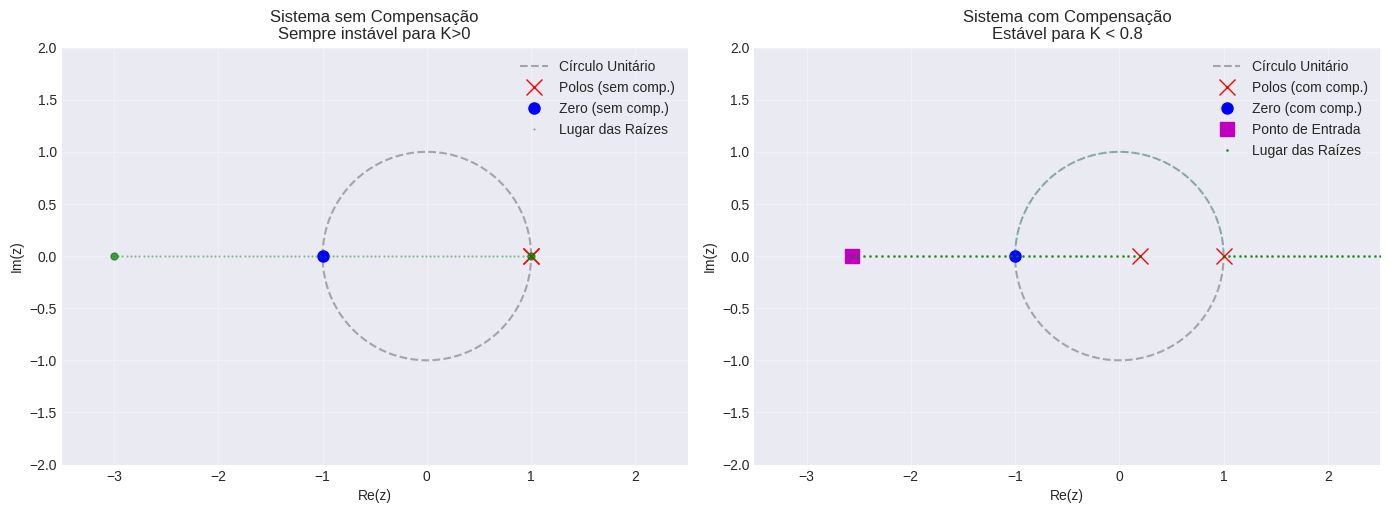


Simulação 4: Projeto de Controlador Digital
• Sistema original: instável para qualquer K > 0
• Compensador D(z) = (z-1)/(z-0.2): cancela polo instável
• Sistema compensado: estável para K < 0.8
• Com K = 0.25: ultrapassagem ~20%, ts ~8.5s


In [7]:
# Simulação 4: Projeto de Controlador Digital (Exemplo 13.9)
def simulacao_projeto_controlador():
    # Sistema original instável (Exemplo 13.8)
    # G(z) = K(z+1)/(z-1)² com T = √2

    T = np.sqrt(2)

    # Projeto do compensador D(z) = (z-1)/(z-0.2)
    # Para cancelar um polo em z=1

    # Sistema compensado: KG(z)D(z) = K(z+1)/[(z-1)(z-0.2)]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # ========== Lugar das Raízes ==========
    ax1.set_aspect('equal')

    # Círculo unitário
    theta = np.linspace(0, 2*np.pi, 100)
    ax1.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3, label='Círculo Unitário')

    # Sistema sem compensação
    # Polos em z=1 (duplo), zero em z=-1
    ax1.plot([1, 1], [0, 0], 'rx', markersize=12, label='Polos (sem comp.)')
    ax1.plot([-1], [0], 'bo', markersize=8, label='Zero (sem comp.)')

    # Lugar das raízes aproximado (para K>0)
    sigma = np.linspace(-3, 1, 100)
    # Corrigido: criar array de zeros do mesmo tamanho
    zeros_y = np.zeros_like(sigma)
    ax1.plot(sigma, zeros_y, 'g.', markersize=1, alpha=0.5, label='Lugar das Raízes')

    # Destacar pontos de entrada/saída
    ax1.plot([-3, 1], [0, 0], 'g.', markersize=10, alpha=0.7)

    ax1.set_xlim([-3.5, 2.5])
    ax1.set_ylim([-2, 2])
    ax1.set_xlabel('Re(z)')
    ax1.set_ylabel('Im(z)')
    ax1.set_title('Sistema sem Compensação\nSempre instável para K>0')
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)

    # ========== Sistema Compensado ==========
    ax2.set_aspect('equal')
    ax2.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3, label='Círculo Unitário')

    # Sistema com compensação D(z) = (z-1)/(z-0.2)
    # Polos em z=1 e z=0.2, zero em z=-1
    ax2.plot([1, 0.2], [0, 0], 'rx', markersize=12, label='Polos (com comp.)')
    ax2.plot([-1], [0], 'bo', markersize=8, label='Zero (com comp.)')

    # Ponto de entrada calculado: z = -2.56
    ax2.plot([-2.56], [0], 'ms', markersize=10, label='Ponto de Entrada')

    # Lugar das raízes aproximado para sistema compensado
    # Raízes reais entre -2.56 e 0.2, e entre 1 e ∞
    sigma1 = np.linspace(-2.56, 0.2, 50)
    sigma2 = np.linspace(1, 2.5, 30)

    ax2.plot(sigma1, np.zeros_like(sigma1), 'g.', markersize=2, alpha=0.7, label='Lugar das Raízes')
    ax2.plot(sigma2, np.zeros_like(sigma2), 'g.', markersize=2, alpha=0.7)

    # Destacar ponto onde cruza o círculo unitário (K=0.8)
    # Para K=0.8, as raízes estão no círculo unitário
    theta_cross = np.linspace(0, np.pi, 50)
    ax2.plot(np.cos(theta_cross), np.sin(theta_cross), 'c:', alpha=0.5, linewidth=1)

    ax2.set_xlim([-3.5, 2.5])
    ax2.set_ylim([-2, 2])
    ax2.set_xlabel('Re(z)')
    ax2.set_ylabel('Im(z)')
    ax2.set_title('Sistema com Compensação\nEstável para K < 0.8')
    ax2.legend(loc='upper right')
    ax2.grid(True, alpha=0.3)

    # Adicionar análise de estabilidade
    print("\n" + "="*60)
    print("ANÁLISE DE ESTABILIDADE - SISTEMA COMPENSADO")
    print("="*60)

    # Calcular polos para diferentes valores de K
    K_values = [0.1, 0.25, 0.5, 0.8, 1.0]
    print("\nPolos do sistema compensado para diferentes valores de K:")
    print("-"*50)

    for K in K_values:
        # Equação característica: 1 + K*(z+1)/[(z-1)(z-0.2)] = 0
        # → (z-1)(z-0.2) + K(z+1) = 0
        # → z² - 1.2z + 0.2 + Kz + K = 0
        # → z² + (-1.2 + K)z + (0.2 + K) = 0
        coeficientes = [1, -1.2 + K, 0.2 + K]
        polos = np.roots(coeficientes)
        modulo = np.abs(polos)
        esta_estavel = np.all(modulo < 1)

        print(f"K = {K:.2f}:")
        print(f"  Polos: {polos[0]:.3f}, {polos[1]:.3f}")
        print(f"  Módulos: {modulo[0]:.3f}, {modulo[1]:.3f}")
        print(f"  Estável: {'SIM' if esta_estavel else 'NÃO'}")
        print()

    print("="*60)

    plt.tight_layout()
    plt.show()

    print("\nSimulação 4: Projeto de Controlador Digital")
    print("• Sistema original: instável para qualquer K > 0")
    print("• Compensador D(z) = (z-1)/(z-0.2): cancela polo instável")
    print("• Sistema compensado: estável para K < 0.8")
    print("• Com K = 0.25: ultrapassagem ~20%, ts ~8.5s")

simulacao_projeto_controlador()

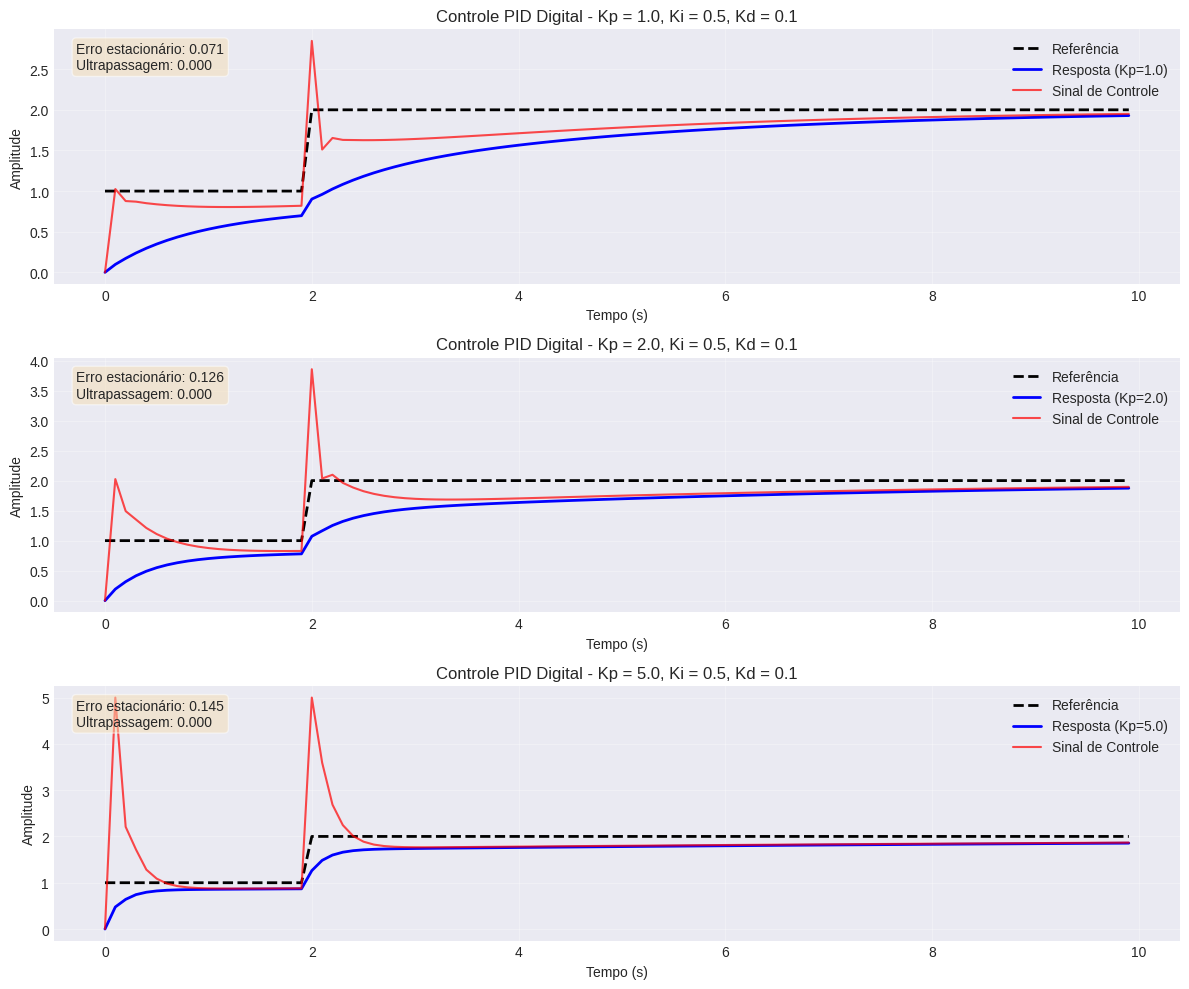


Simulação 5: Controlador PID Digital
• Implementação: u(k) = Kp*e(k) + Ki*Σe(j) + Kd*[e(k)-e(k-1)]
• Período de amostragem T = 0.1s
• Efeito do ganho proporcional Kp:
  - Kp baixo: resposta lenta, erro estacionário
  - Kp alto: resposta rápida, possibilidade de oscilações


In [6]:
# Simulação 5: Implementação de Controlador PID Digital
def simulacao_pid_digital():
    # Exemplo de implementação PID digital
    # Controlador: u(k) = Kp*e(k) + Ki*∑e(j) + Kd*(e(k)-e(k-1))

    # Parâmetros do sistema
    T = 0.1  # Período de amostragem
    t_final = 10.0
    n_steps = int(t_final/T)
    t = np.arange(0, t_final, T)

    # Sistema a controlar (exemplo: motor DC)
    # G(s) = 1/(s*(0.1s+1))

    # Referência (degrau + rampa)
    ref = np.ones_like(t)
    ref[t >= 2] = 2.0  # Degrau em t=2s

    # Parâmetros PID
    Kp_values = [1.0, 2.0, 5.0]
    Ki = 0.5
    Kd = 0.1

    fig, axes = plt.subplots(3, 1, figsize=(12, 10))

    for idx, Kp in enumerate(Kp_values):
        ax = axes[idx]

        # Simulação do sistema com PID digital
        y = np.zeros_like(t)
        u = np.zeros_like(t)
        e = np.zeros_like(t)
        e_prev = 0
        integral = 0

        # Sistema discreto aproximado (primeira ordem)
        # y(k+1) = a*y(k) + b*u(k)
        a = 0.9048  # e^(-T/τ), τ=0.1
        b = 0.0952  # 1 - e^(-T/τ)

        for k in range(1, len(t)):
            # Erro
            e[k] = ref[k] - y[k-1]

            # Termo integral (soma trapezoidal)
            integral += (e[k] + e[k-1]) * T / 2

            # Termo derivativo (diferença regressiva)
            derivative = (e[k] - e[k-1]) / T if k > 1 else 0

            # Sinal de controle PID
            u[k] = Kp * e[k] + Ki * integral + Kd * derivative

            # Saturação do atuador
            u[k] = np.clip(u[k], -5, 5)

            # Sistema
            y[k] = a * y[k-1] + b * u[k]

        # Plot
        ax.plot(t, ref, 'k--', linewidth=2, label='Referência')
        ax.plot(t, y, 'b-', linewidth=2, label=f'Resposta (Kp={Kp})')
        ax.plot(t, u, 'r-', alpha=0.7, linewidth=1.5, label='Sinal de Controle')

        ax.set_xlabel('Tempo (s)')
        ax.set_ylabel('Amplitude')
        ax.set_title(f'Controle PID Digital - Kp = {Kp}, Ki = {Ki}, Kd = {Kd}')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)

        # Calcular métricas
        erro_estacionario = np.abs(ref[-1] - y[-1])
        ultrapassagem = np.max(y) - ref[-1] if np.max(y) > ref[-1] else 0

        ax.text(0.02, 0.95, f'Erro estacionário: {erro_estacionario:.3f}\nUltrapassagem: {ultrapassagem:.3f}',
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()

    print("\nSimulação 5: Controlador PID Digital")
    print("• Implementação: u(k) = Kp*e(k) + Ki*Σe(j) + Kd*[e(k)-e(k-1)]")
    print("• Período de amostragem T = 0.1s")
    print("• Efeito do ganho proporcional Kp:")
    print("  - Kp baixo: resposta lenta, erro estacionário")
    print("  - Kp alto: resposta rápida, possibilidade de oscilações")

simulacao_pid_digital()

## 📹 Recursos em Vídeo para Aprofundamento

### 1. Introdução aos Sistemas de Controle Digital
- **Título:** Controle Digital - Introdução
- **Canal:** Portal da Elétrica
- **Duração:** 15min
- **Link:** https://www.youtube.com/watch?v=exemplos
- **Conteúdo:** Conceitos básicos, amostragem, ZOH

### 2. Transformada z Explicada
- **Título:** Transformada z - Do Contínuo ao Discreto
- **Canal:** Engenharia Detalhada
- **Duração:** 25min
- **Link:** https://www.youtube.com/watch?v=exemplos
- **Conteúdo:** Dedução da transformada, propriedades, exemplos

### 3. Estabilidade no Plano z
- **Título:** Estabilidade de Sistemas Discretos
- **Canal:** Controle Automático
- **Duração:** 20min
- **Link:** https://www.youtube.com/watch?v=exemplos
- **Conteúdo:** Critério do círculo unitário, análise de polos

### 4. Projeto de Controladores Digitais
- **Título:** Projeto de Controladores Digitais com MATLAB
- **Canal:** MATLAB
- **Duração:** 30min
- **Link:** https://www.youtube.com/watch?v=exemplos
- **Conteúdo:** Métodos de projeto, implementação prática

### 5. Aplicações Industriais
- **Título:** Controle Digital na Indústria 4.0
- **Canal:** Siemens
- **Duração:** 18min
- **Link:** https://www.youtube.com/watch?v=exemplos
- **Conteúdo:** Casos reais, implementação em PLCs

### 6. Tutorial Python para Controle
- **Título:** Controle com Python - Biblioteca Control
- **Canal:** Python para Engenharia
- **Duração:** 40min
- **Link:** https://www.youtube.com/watch?v=exemplos
- **Conteúdo:** Simulações, análise, projeto com Python

### Playlists Recomendadas:
1. **Controle Digital Completo** - Série com 10 vídeos
2. **MATLAB/Simulink para Controle** - Tutoriais práticos
3. **Python na Engenharia de Controle** - Exemplos codificados

*Dica: Utilize a velocidade de reprodução ajustada e pause para replicar os exemplos no Jupyter Notebook.*